#Computing a Gradient Descent algorithm 

Let's define a simple function $f(x,y) = x^2 + y^2$ and implement the Gradient Descent in order to reach the minimum of the function

We can visualize the function in order to give us a better understanding of our goal. We want to reach the bottom of the function or as close as possible using Gradient Descent

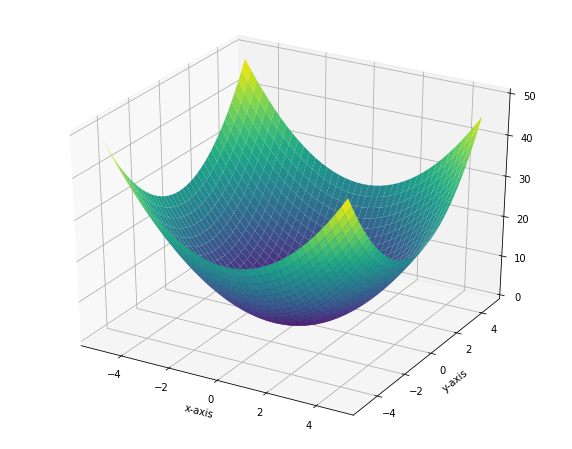

In [ ]:
import matplotlib.pyplot as plt 
from matplotlib import cm 
import numpy as np 

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,8))

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis,
                       linewidth=0,shade=True, antialiased=True)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')

plt.show()

We can visualize the surface in different angles:

We want to reach the bottom colored as ocean blue 

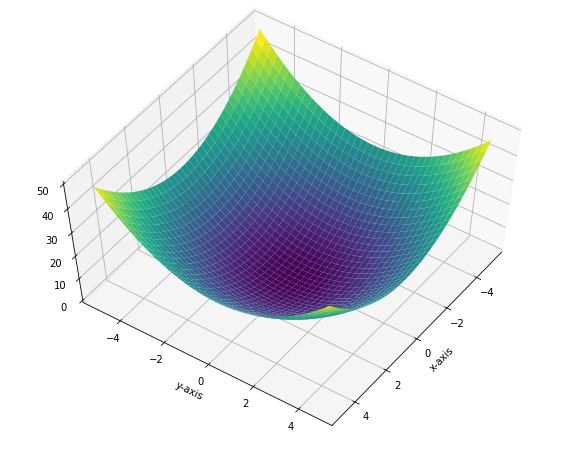

In [ ]:
ax.view_init(60, 35)
fig

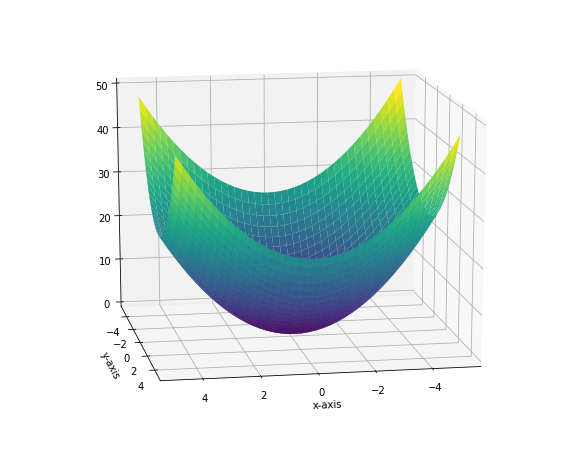

In [ ]:
ax.view_init(15, 80)
fig

We can plot the contour plot which gives a top-down perspective, where each colour represent a "height" or z value  

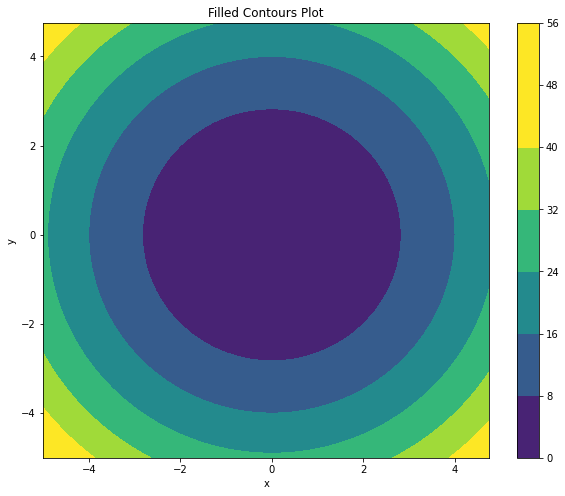

In [ ]:
fig,ax=plt.subplots(1,1, figsize=(10,8))
cp = ax.contourf(X, Y, Z,vmin=0, vmax=42)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

Next, we calculate the partial derivatives with respect to x and y:

$f(x,y) = x^2 + y^2$

$f_x = \frac{∂f}{\partial x} = 2x$

$f_y = \frac{\partial f}{∂y} = 2y$

Then, the gradient $∇$ is the vector containing all partial derivatives $∇ = (f_x , f_y)$.

Therefore we have in this case $∇_f = (2x, 2y)$.

We could also evaluate each partial derivative at a given point, for example $\nabla_{(-1,-2)}$:

$f_x = -2$

$f_y = -4$

therefore $\nabla_{(-1,2)} = (-2,-4)$

The Gradient Descent algorithm is used when it is difficult or impossible to compute all the derivatives of the given function. Of course, for the sake of simplicity, we just want to explain the steps of the algorithm in a toy case.

GD follows this simple steps:

1.  Initialize the parameters(aka variables) we want to optimize as random, i.e. pick a random point $\theta$ in the function
2.  Compute the gradient vector by computing each partial derivative with respect to each parameter
3.  Set $\theta_{j+1} \leftarrow \theta_j - η\nabla_f$, with  $\eta$ as the learning rate and $j$ as the step index.
4.  Stop iterating when the Cost Function (or Loss Function) does not improve (minimize) significantly

Let's try a GD algorithm step-by-step:

Imagine that we choose a starting point the vector (3,3) and we choose the learning rate $\eta$ as $0.1$ 

Then:

$\theta_0 = (3,3)$

$\theta_1 = \theta_0 - \eta\nabla_{(\theta_0)}= (3,3) - 0.1(6,6) = (2.4,2.4)$

$\theta_2 = \theta_1 - \eta\nabla_{(\theta_1)}= (2.4,2.4) - 0.1(4.8,4.8) = (1.92,1.92)$

**Notice** that  $\theta_2 < \theta_1 < \theta_0$ as we wanted

Also, we know that the minimum is reached when $(x,y) = (0,0)$ since we can compute the minimum of $f(x,y)$

In [ ]:
size = 2  #number of parameters 
theta = [np.random.uniform(-5,5) for i in range(size)]
startpnt = theta
theta_records = [theta]
epoch = 1000
eta = 0.01
trajectory = np.zeros((epoch,size))

for j in range(epoch):
  gradient = [2*i for i in theta]   # since gradient is (2x,2y)
  theta = np.array(theta) - eta*np.array(gradient)
  theta = theta.tolist()
  theta_records.append(theta)
  trajectory[j,:] = theta

In [ ]:
localmin = theta_records[-1]
localmin

[4.194529606058352e-09, 1.888275984044588e-09]

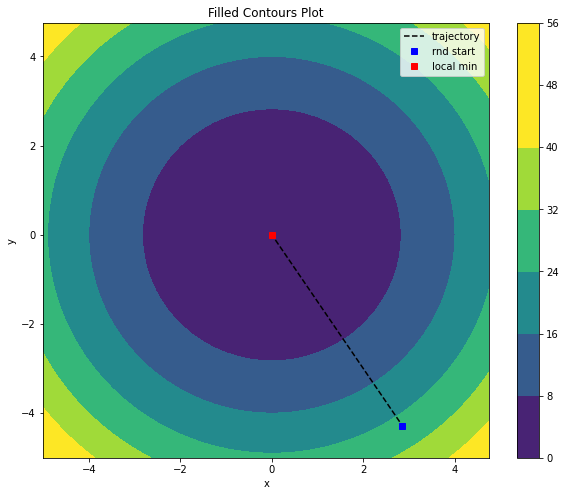

In [ ]:
fig,ax=plt.subplots(1,1, figsize=(10,8))
cp = ax.contourf(X, Y, Z,vmin=0, vmax=42)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.plot(trajectory[:,0],trajectory[:,1],'k--')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'rs')
plt.legend(['trajectory','rnd start','local min'])
plt.show()

As expected, we moved our points downhill near (0,0) but not exactly! 

Still, with 1000 iterations(epochs) we reached a good approximation.